In [227]:
import pandas as pd
import re
import math

In [228]:
reg_season_data = pd.read_csv('data/MRegularSeasonDetailedResults.csv')
team_ids = pd.read_csv('data/MTeams.csv')
seeds = pd.read_csv('data/MNCAATourneySeeds.csv')
team_names = pd.read_csv('data/MTeams.csv')
conferences = pd.read_csv('data/MTeamConferences.csv')

In [229]:
recent_regular_season_data = reg_season_data[reg_season_data['Season'] >= 2010]

In [230]:
recent_regular_season_data[recent_regular_season_data['Season'] == 2024]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
107634,2024,0,1101,64,1329,59,A,0,26,57,...,23,8,20,6,26,13,12,9,2,16
107635,2024,0,1103,81,1355,75,A,0,26,57,...,19,11,13,5,18,14,12,8,2,17
107636,2024,0,1104,105,1287,73,H,0,32,57,...,23,12,19,11,15,7,14,6,3,25
107637,2024,0,1112,122,1288,59,H,0,42,76,...,22,8,15,6,17,10,25,3,6,25
107638,2024,0,1114,71,1402,66,H,0,22,59,...,23,13,22,17,31,14,22,2,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113236,2024,132,1120,86,1196,67,N,0,31,61,...,13,18,25,13,26,9,11,8,6,17
113237,2024,132,1182,57,1433,51,N,0,17,57,...,24,12,14,9,25,9,16,10,9,16
113238,2024,132,1228,93,1458,87,N,0,30,57,...,20,20,23,13,17,17,7,7,1,20
113239,2024,132,1412,85,1396,69,N,0,31,63,...,21,14,17,11,26,17,14,6,6,18


In [231]:
#Setup all data
mean_data = []
for team_id in team_ids['TeamID']:
    sum_data = []
    count_data = []
    team_reg_season_data = recent_regular_season_data[(recent_regular_season_data['WTeamID'] == team_id) | (recent_regular_season_data['LTeamID'] == team_id)]
    winning_data = team_reg_season_data[team_reg_season_data['WTeamID'] == team_id][['Season', 'WScore',
        'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']]
    winning_data['TeamID'] = team_id
    winning_data.columns = winning_data.columns.str.replace('W', '')
    winning_data_sums = winning_data.groupby(['Season', 'TeamID']).sum()
    winning_data_counts = winning_data.groupby(['Season', 'TeamID']).count()
    sum_data.append(winning_data_sums)
    count_data.append(winning_data_counts)
    
    
    losing_data = team_reg_season_data[team_reg_season_data['WTeamID'] == team_id][['Season', 'LScore', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']]
    losing_data['TeamID'] = team_id
    losing_data.columns = losing_data.columns.str.replace('L', '')
    losing_data_sums = losing_data.groupby(['Season', 'TeamID']).sum()
    losing_data_counts = losing_data.groupby(['Season', 'TeamID']).count()
    sum_data.append(losing_data_sums)
    count_data.append(losing_data_counts)
    team_sums = pd.concat(sum_data).groupby(['Season', 'TeamID']).sum()
    team_counts = pd.concat(count_data).groupby(['Season', 'TeamID']).sum()
    team_means = team_sums / team_counts
    mean_data.append(team_means)

In [232]:
team_reg_season_average_data = pd.concat(mean_data)
team_reg_season_average_data = team_reg_season_average_data.add_prefix('Season_Avg_')
team_reg_season_average_data

,,Season_Avg_Score,Season_Avg_FGM,Season_Avg_FGA,Season_Avg_FGM3,Season_Avg_FGA3,Season_Avg_FTM,Season_Avg_FTA,Season_Avg_OR,Season_Avg_DR,Season_Avg_Ast,Season_Avg_TO,Season_Avg_Stl,Season_Avg_Blk,Season_Avg_PF
Season,TeamID,,,,,,,,,,,,,,
2014,1101,78.250000,28.000000,50.750000,4.750000,11.500000,17.500000,27.500000,9.000000,20.250000,13.000000,14.750000,9.250000,1.750000,22.000000
2015,1101,71.357143,24.500000,52.500000,7.285714,18.928571,15.071429,19.857143,9.642857,21.357143,12.285714,14.214286,6.000000,2.214286,19.214286
2016,1101,74.444444,24.833333,53.388889,5.111111,15.000000,19.666667,27.666667,8.777778,23.944444,11.777778,14.222222,6.666667,2.944444,23.055556
2017,1101,72.000000,24.000000,52.277778,7.388889,19.000000,16.611111,24.666667,9.833333,23.111111,12.833333,15.666667,6.555556,2.611111,21.333333
2018,1101,72.583333,25.625000,56.625000,7.208333,20.791667,14.125000,20.583333,9.333333,25.000000,13.750000,13.250000,5.708333,4.166667,18.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,1476,67.423077,24.000000,55.461538,7.384615,21.923077,12.038462,15.884615,7.000000,23.769231,12.307692,12.346154,6.538462,2.653846,16.384615
2024,1476,61.333333,22.000000,54.500000,7.500000,24.333333,9.833333,16.333333,9.000000,23.833333,11.333333,10.000000,5.000000,2.833333,16.666667
2023,1477,69.375000,24.375000,56.125000,7.291667,23.625000,13.333333,19.000000,8.250000,22.833333,13.833333,11.625000,6.125000,2.458333,17.666667


In [233]:
tournament_data = pd.read_csv('data/MNCAATourneyDetailedResults.csv')
seed_data = pd.read_csv('data/MNCAATourneySeeds.csv')

In [234]:
tourney_data = []

for team_id in team_ids['TeamID']:
    team_data = []
    winning_team_tourney_data = tournament_data[tournament_data['WTeamID'] == team_id][['Season', 'WTeamID', 'WScore']]
    winning_team_tourney_data.columns = ['Season', 'TeamID', 'Score']
    winning_team_tourney_data = winning_team_tourney_data.merge(team_reg_season_average_data, left_on=['Season', 'TeamID'], right_on=['Season', 'TeamID'])
    tourney_data.append(winning_team_tourney_data)
    
    
    
    losing_team_tourney_data = tournament_data[tournament_data['LTeamID'] == team_id][['Season', 'LTeamID', 'LScore']]
    losing_team_tourney_data.columns = ['Season', 'TeamID', 'Score']

    losing_team_tourney_data = losing_team_tourney_data.merge(team_reg_season_average_data, left_on=['Season', 'TeamID'], right_on=['Season', 'TeamID'])
    tourney_data.append(losing_team_tourney_data)
    

In [235]:
tourney_model_data = pd.concat(tourney_data)
tourney_model_data.sort_values('Season', inplace=True)
tourney_model_data = tourney_model_data.merge(seed_data, on=['Season', 'TeamID']).drop_duplicates()
tourney_model_data['Seed'] = tourney_model_data['Seed'].map(lambda x: int(''.join(re.findall('[0-9]', x))))

In [236]:
#Create Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import operator

In [237]:
log_tourney_data = tournament_data[['Season', 'WTeamID', 'LTeamID']]
log_tourney_data = log_tourney_data[log_tourney_data['Season'] != 2024]

In [238]:
#Team 1
team1_tourney_data = log_tourney_data.merge(team_reg_season_average_data, left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'])

team1_tourney_data = team1_tourney_data.merge(team_reg_season_average_data, left_on=['Season', 'LTeamID'], right_on = ['Season', 'TeamID'], suffixes=['', '_Opponent'])

team1_tourney_data = team1_tourney_data.merge(seed_data, left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'])

team1_tourney_data = team1_tourney_data.merge(seed_data, left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'], suffixes=['', '_Opponent'])

team1_tourney_data['Seed'] = team1_tourney_data['Seed'].map(lambda x: int(''.join(re.findall('[0-9]', x))))
team1_tourney_data['Seed_Opponent'] = team1_tourney_data['Seed_Opponent'].map(lambda x: int(''.join(re.findall('[0-9]', x))))

team1_tourney_data['Seed_Diff'] = team1_tourney_data['Seed_Opponent'] - team1_tourney_data['Seed']

team1_tourney_data['Win'] = 1



#Team 2
team2_tourney_data = log_tourney_data.merge(team_reg_season_average_data, left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'])

team2_tourney_data = team2_tourney_data.merge(team_reg_season_average_data, left_on=['Season', 'LTeamID'], right_on = ['Season', 'TeamID'], suffixes=['_Opponent', ''])

team2_tourney_data = team2_tourney_data.merge(seed_data, left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'])

team2_tourney_data = team2_tourney_data.merge(seed_data, left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'], suffixes=['_Opponent', ''])

team2_tourney_data['Seed'] = team2_tourney_data['Seed'].map(lambda x: int(''.join(re.findall('[0-9]', x))))
team2_tourney_data['Seed_Opponent'] = team2_tourney_data['Seed_Opponent'].map(lambda x: int(''.join(re.findall('[0-9]', x))))

team2_tourney_data['Seed_Diff'] = team2_tourney_data['Seed_Opponent'] - team2_tourney_data['Seed']

team2_tourney_data['Win'] = 0

In [239]:
#Both
combined_tourney_data = pd.concat([team1_tourney_data, team2_tourney_data])

combined_tourney_data = combined_tourney_data[['Season_Avg_Score', 'Season_Avg_FGM',
       'Season_Avg_FGA', 'Season_Avg_FGM3', 'Season_Avg_FGA3',
       'Season_Avg_FTM', 'Season_Avg_FTA', 'Season_Avg_OR', 'Season_Avg_DR',
       'Season_Avg_Ast', 'Season_Avg_TO', 'Season_Avg_Stl', 'Season_Avg_Blk',
       'Season_Avg_PF', 'Season_Avg_Score_Opponent', 'Season_Avg_FGM_Opponent',
       'Season_Avg_FGA_Opponent', 'Season_Avg_FGM3_Opponent',
       'Season_Avg_FGA3_Opponent', 'Season_Avg_FTM_Opponent',
       'Season_Avg_FTA_Opponent', 'Season_Avg_OR_Opponent',
       'Season_Avg_DR_Opponent', 'Season_Avg_Ast_Opponent',
       'Season_Avg_TO_Opponent', 'Season_Avg_Stl_Opponent',
       'Season_Avg_Blk_Opponent', 'Season_Avg_PF_Opponent', 'Seed',
       'Seed_Opponent', 'Seed_Diff', 'Win']]

In [240]:
X = combined_tourney_data.drop(['Win', 'Seed', 'Seed_Opponent'], axis=1)
y = combined_tourney_data['Win']

In [241]:
def remove_most_insignificant(df, results):
    # use operator to find the key which belongs to the maximum value in the dictionary:
    max_p_value = max(results.pvalues.iteritems(), key=operator.itemgetter(1))[0]
    # this is the feature you want to drop:
    df.drop(columns = max_p_value, inplace = True)
    return df

In [242]:
insignificant_feature = True
while insignificant_feature:
        model = sm.OLS(y, X)
        results = model.fit()
        significant = [p_value < 0.05 for p_value in results.pvalues]
        if all(significant):
            insignificant_feature = False
        else:
            if X.shape[1] == 1:  # if there's only one insignificant variable left
                print('No significant features found')
                results = None
                insignificant_feature = False
            else:            
                X = remove_most_insignificant(X, results)
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    Win   R-squared (uncentered):                   0.605
Model:                            OLS   Adj. R-squared (uncentered):              0.603
Method:                 Least Squares   F-statistic:                              293.5
Date:                Thu, 02 May 2024   Prob (F-statistic):                        0.00
Time:                        12:18:07   Log-Likelihood:                         -1054.3
No. Observations:                1734   AIC:                                      2127.
Df Residuals:                    1725   BIC:                                      2176.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
logistic = LogisticRegression().fit(X, y)
logistic.score(X_test,y_test)

0.7241379310344828

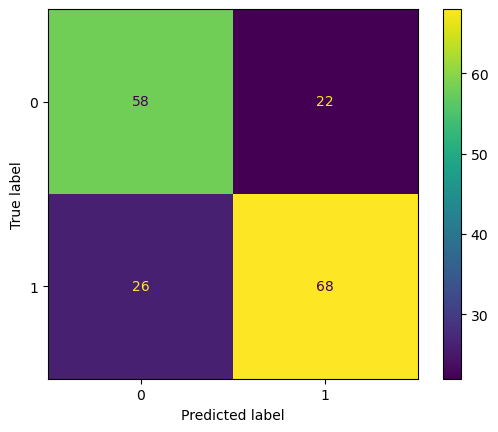

In [244]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, logistic.predict(X_test))

In [245]:
def predict_matchup(team1, team2, season, team1_seed, team2_seed, model):
    team1_name = list(team_names[team_names['TeamID'] == team1]['TeamName'])[0]
    team2_name = list(team_names[team_names['TeamID'] == team2]['TeamName'])[0]
    print(f'{team1_name} vs {team2_name}')
    season_data = team_reg_season_average_data.query(f'Season == {season}').reset_index()
    team1_data = season_data.query(f'TeamID == {team1}')
    team2_data = season_data.query(f'TeamID == {team2}')
    
    match_data = team1_data.merge(team2_data, on='Season', suffixes=['', '_Opponent'])
    
    match_data['Seed_Diff'] = team2_seed - team1_seed
    
    match_data = match_data[['Season_Avg_FGA', 'Season_Avg_FTA', 'Season_Avg_DR', 'Season_Avg_Ast', 'Season_Avg_FGA_Opponent', 'Season_Avg_FTA_Opponent', 'Season_Avg_DR_Opponent', 'Season_Avg_Ast_Opponent', 'Seed_Diff']]

    win_prob = model.predict_proba(match_data)[0][1]
    
    team1_win_prob = win_prob*100
    team2_win_prob = 100 - team1_win_prob
    if win_prob > 0.5:
        team1_odds = math.ceil((100*team1_win_prob)/(team1_win_prob - 100))
        team2_odds = -math.ceil(((100*(team2_win_prob-100))/(team2_win_prob)))
    elif win_prob < 0.5:
        team1_odds = -math.ceil(((100*(team1_win_prob-100))/(team1_win_prob)))
        team2_odds = math.ceil((100*team2_win_prob)/(team2_win_prob - 100))

    else:
        team1_odds = 100
        team2_odds = 100

    
    print(f'{team1_name} has a {round(win_prob*100,2)}% Chance of Winning ({team1_odds})')
    print(f'{team2_name} has a {round((1- win_prob)*100,2)}% Chance of Winning ({team2_odds})')
    
    if (win_prob > (1 - win_prob)) :
        return team1
    else:
        return team2
    

In [246]:
matchups_2024= tournament_data[['Season', 'WTeamID', 'LTeamID']]
matchups_2024 = matchups_2024[matchups_2024['Season'] == 2024]

for index, matchup in matchups_2024.iterrows():
    predict_matchup(matchup['WTeamID'], matchup['LTeamID'], matchup['Season'])

In [247]:
#Split teams into regions
seeds_2024 = pd.read_csv('data/MNCAATourneySeeds.csv')
tourney_teams = list(seeds_2024[seeds_2024['Season'] == 2024]['TeamID'])

remainingEast = tourney_teams[0:16]
remainingWest = tourney_teams[16:33]
remainingMidwest = tourney_teams[33:51]
remainingSouth = tourney_teams[51:68]
# for i in range (len(remainingEast)):

# list(seeds_2024[seeds_2024['Season'] == 2024]['TeamID'])


In [248]:
#Simulate first 4
firstfour1 = predict_matchup(1129, 1160, 2024, 10, 10, logistic) #south
firstfour2 = predict_matchup(1286, 1212, 2024, 16, 16, logistic) #midwest
firstfour3 = predict_matchup(1438, 1161, 2024, 10, 10, logistic) #midwest
firstfour4 = predict_matchup(1447, 1224, 2024, 16, 16, logistic) #west

Boise St vs Colorado
Boise St has a 53.43% Chance of Winning (-114)
Colorado has a 46.57% Chance of Winning (114)
Montana St vs Grambling
Montana St has a 46.48% Chance of Winning (115)
Grambling has a 53.52% Chance of Winning (-115)
Virginia vs Colorado St
Virginia has a 56.01% Chance of Winning (-127)
Colorado St has a 43.99% Chance of Winning (127)
Wagner vs Howard
Wagner has a 52.63% Chance of Winning (-111)
Howard has a 47.37% Chance of Winning (111)


In [249]:
#Remove First Four Losers
remainingSouth.remove(1160)
remainingMidwest.remove(1286)
remainingMidwest.remove(1161)
remainingWest.remove(1224)

In [250]:
#Simulate up until Elite 8
for i in range (4):
    tempEast = []
    tempWest = []
    tempMidwest = []
    tempSouth = []

    for j in range (int(len(remainingEast) / 2)):
        team1_seed = seeds_2024[(seeds_2024['TeamID'] == remainingEast[j]) & (seeds_2024['Season'] == 2024)]['Seed'].values[0]
        team2_seed = seeds_2024[(seeds_2024['TeamID'] == remainingEast[len(remainingEast) - j - 1]) & (seeds_2024['Season'] == 2024)]['Seed'].values[0]
        team1_seed = int(''.join(re.findall('[0-9]', team1_seed)))
        team2_seed = int(''.join(re.findall('[0-9]', team2_seed)))


        tempEast.append(predict_matchup(remainingEast[j], remainingEast[len(remainingEast) - j - 1], 2024, team1_seed, team2_seed, logistic))
        tempWest.append(predict_matchup(remainingWest[j], remainingWest[len(remainingEast) - j - 1], 2024, team1_seed, team2_seed, logistic))
        tempSouth.append(predict_matchup(remainingSouth[j], remainingSouth[len(remainingEast) - j - 1], 2024, team1_seed, team2_seed, logistic))
        tempMidwest.append(predict_matchup(remainingMidwest[j], remainingMidwest[len(remainingEast) - j - 1], 2024, team1_seed, team2_seed, logistic))

    remainingEast = tempEast
    remainingSouth = tempSouth
    remainingWest = tempWest
    remainingMidwest = tempMidwest

print(remainingEast + remainingMidwest + remainingSouth + remainingWest)

# Simulate Final 4
natty = []
final4 = remainingEast + remainingWest + remainingSouth + remainingMidwest

team1_seed = seeds_2024[(seeds_2024['TeamID'] == final4[0]) & (seeds_2024['Season'] == 2024)]['Seed'].values[0]
team2_seed = seeds_2024[(seeds_2024['TeamID'] == final4[1]) & (seeds_2024['Season'] == 2024)]['Seed'].values[0]
team3_seed = seeds_2024[(seeds_2024['TeamID'] == final4[2]) & (seeds_2024['Season'] == 2024)]['Seed'].values[0]
team4_seed = seeds_2024[(seeds_2024['TeamID'] == final4[3]) & (seeds_2024['Season'] == 2024)]['Seed'].values[0]

team1_seed = int(''.join(re.findall('[0-9]', team1_seed)))
team2_seed = int(''.join(re.findall('[0-9]', team2_seed)))
team3_seed = int(''.join(re.findall('[0-9]', team3_seed)))
team4_seed = int(''.join(re.findall('[0-9]', team4_seed)))

natty.append(predict_matchup(final4[0], final4[1], 2024, team1_seed, team2_seed, logistic))
natty.append(predict_matchup(final4[2], final4[3], 2024, team3_seed, team4_seed, logistic))

predict_matchup(natty[0], natty[1], 2024, 1, 1, logistic)


Connecticut vs Stetson
Connecticut has a 82.76% Chance of Winning (-480)
Stetson has a 17.24% Chance of Winning (480)
North Carolina vs Wagner
North Carolina has a 87.26% Chance of Winning (-684)
Wagner has a 12.74% Chance of Winning (684)
Houston vs Longwood
Houston has a 89.34% Chance of Winning (-838)
Longwood has a 10.66% Chance of Winning (838)
Purdue vs Grambling
Purdue has a 84.09% Chance of Winning (-528)
Grambling has a 15.91% Chance of Winning (528)
Iowa St vs S Dakota St
Iowa St has a 83.8% Chance of Winning (-517)
S Dakota St has a 16.2% Chance of Winning (517)
Arizona vs Long Beach St
Arizona has a 85.08% Chance of Winning (-570)
Long Beach St has a 14.92% Chance of Winning (570)
Marquette vs WKU
Marquette has a 88.75% Chance of Winning (-788)
WKU has a 11.25% Chance of Winning (788)
Tennessee vs St Peter's
Tennessee has a 81.29% Chance of Winning (-434)
St Peter's has a 18.71% Chance of Winning (434)
Illinois vs Morehead St
Illinois has a 79.37% Chance of Winning (-384)
M

1222